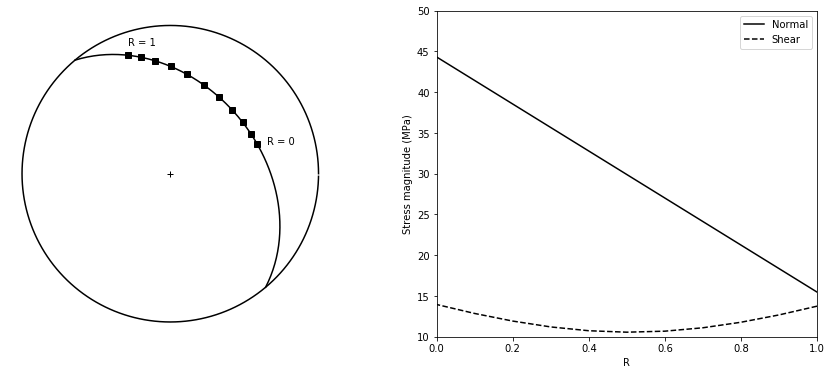

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import ShearOnPlane, GreatCircle and StCoordLine
import sys, os
sys.path.append(os.path.abspath('../functions'))
from ShearOnPlane import ShearOnPlane as ShearOnPlane
from GreatCircle import GreatCircle as GreatCircle
from StCoordLine import StCoordLine as StCoordLine

# Stress tensor in principal stress coordinate system
# start with R = 1, sigma2 = sigma3
stress = np.array([[50, 0, 0],[ 0, 10, 0],[ 0, 0, 10]])

# Trend and plunge of sigma1, and trend of sigma3
tX1 = 325*pi/180
pX1 = 33*pi/180
tX3 = 66*pi/180

# Plane orientation
strike = 320*pi/180
dip = 40*pi/180

# Number of R increments
rinc = 11

# sigma2 increment
sstep = (stress[0,0] - stress[2,2])/(rinc-1)

# Initialize array
nort = np.zeros(rinc) # normal tractions
sht = np.zeros(rinc) # max. shear traction
tsht = np.zeros(rinc) # trend max. shear traction
psht = np.zeros(rinc) # plunge max. shear traction
rval = np.zeros(rinc) # R value

# Compute normal and shear tractions for all Rs
for i in range(rinc):
    stress[1,1] = stress[2,2] + sstep*i
    # Compute normal and maximum shear tractions on plane
    TT,dCTT,R = ShearOnPlane(stress,tX1,pX1,tX3,strike,dip)
    # Extract values
    nort[i] = TT[0,0]
    sht[i] = TT[2,0]
    tsht[i] = TT[2,1]
    psht[i] = TT[2,2]
    rval[i] = R

# Make a larger figure
plt.rcParams['figure.figsize'] = [15, 6]
    
# Plot fault plane and max. shear tractions
# orientations in a lower hemisphere, equal 
# area stereonet
plt.subplot(1,2,1)
# Plot the primitive of the stereonet
r = 1; # unit radius
TH = np.arange(0,360,1)*pi/180
x = r * np.cos(TH)
y = r * np.sin(TH)
plt.plot(x,y,'k')
# Plot center of circle
plt.plot(0,0,'k+')
# Make axes equal and remove them
plt.axis('scaled')
plt.axis('off')
# Plot fault plane
path = GreatCircle(strike,dip,1)
plt.plot(path[:,0], path[:,1], 'k') 
# Plot max. shear tractions orientations 
for i in range(rinc):
    x, y = StCoordLine(tsht[i],psht[i],1)
    plt.plot(x,y,'ks')
    if i == 0:
        plt.annotate('R = 1',(x,y),textcoords='offset points',xytext=(0,10))
    if i == rinc-1:
        plt.annotate('R = 0',(x,y),textcoords='offset points',xytext=(10,0))
    
# Plot normal and shear tractions versus R
plt.subplot(1,2,2)
plt.plot(rval,nort,'k')
plt.plot(rval,sht,'k--')
plt.axis([0, 1, 10, 50])
plt.xlabel('R')
plt.ylabel('Stress magnitude (MPa)')
plt.legend(['Normal', 'Shear'])